In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "data/"

df = pd.read_csv(f"{path}california_housing.csv", low_memory=False)

In [3]:
df.head() # We can clearly observe dataset with head() method which shows top 5 rows from dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info() # We can use info() method to reach information about dataset such as, properties of data, types of data and number of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


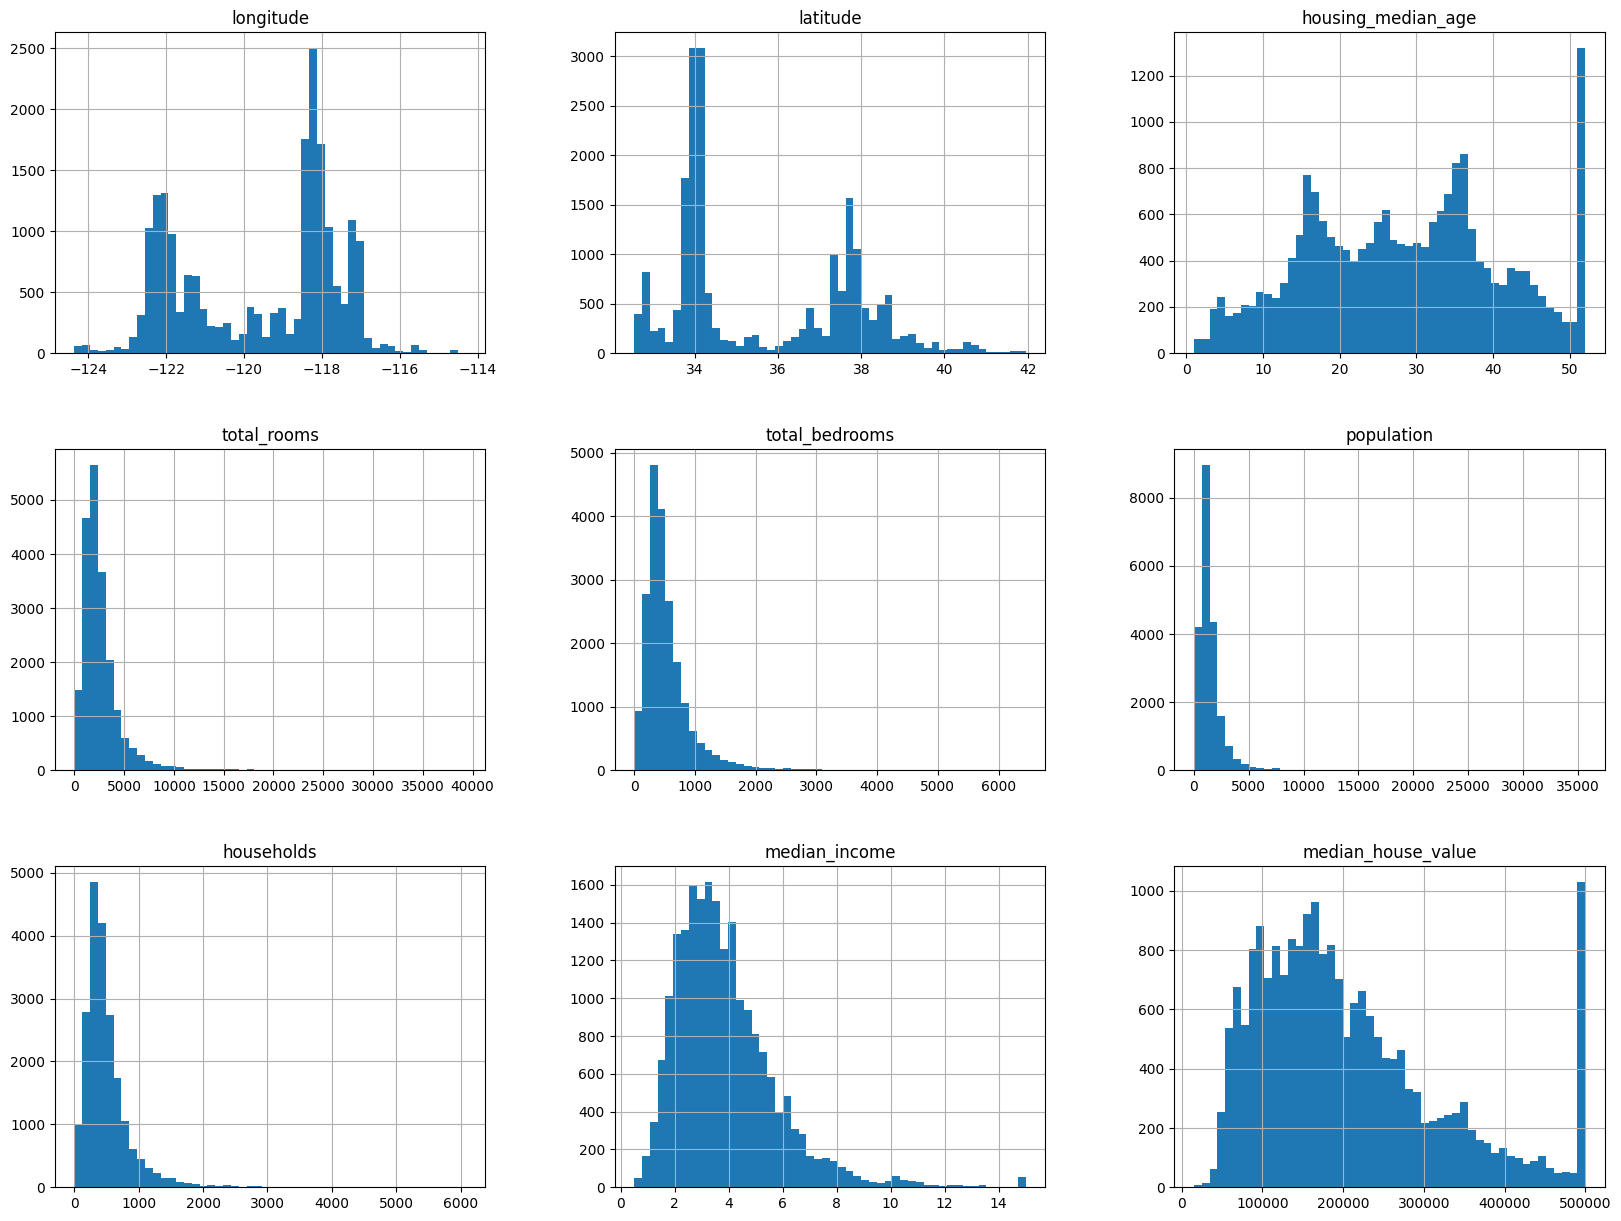

In [5]:
# Data visualization for better understand dataset

df.hist(bins=50,figsize=(20,15))
plt.show()

**Analyzing Null Values

There were no null values in our dataset. We randomly assigned the null value to be suitable for the purpose of the study. The column that we assign a null value is the column that shows the full time in a single cell. We worked on this column as we can fill these null values in the future by pulling the columns containing the time as month-year-day-hour-minute-second separately.

In [6]:
df.isnull().sum() # Analysing null values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Assigning null values with correlation of "total_bedrooms" and "households"
# Covariance between total_bedrooms and households
cov = ((df["total_bedrooms"] -  df["total_bedrooms"] .mean()) * (df["households"] - df["households"].mean())).sum() / (df.shape[0] - 1)

# Standart deviation for "total_bedrooms" and "households"
Sd_total_bedrooms = np.sqrt((np.square(df["total_bedrooms"] - df["total_bedrooms"].mean())).sum() / (df.shape[0] - 1))
Sd_households = np.sqrt((np.square(df["households"] - df["households"].mean())).sum() / (df.shape[0] - 1))

# Correlation between "total_bedrooms" and "households"
corr = cov / (Sd_total_bedrooms * Sd_households)

print(f'Correlation of the total bedrooms and households: {corr}')


Correlation of the total bedrooms and households: 0.974724937213194


**Handling Null Values

  1. First we have to find indexes of the null values in total_bedrooms column.
  2. Then we will get corresponding indexes in the household column.
  3. Finally we will replace null values with the values from household column.


In [8]:
# Finding indexes of the null values in "time.full" column and appending them in to a empty list

null_indexes = []
for (i, v) in df["total_bedrooms"].items():
    if pd.isna(v):
        null_indexes.append(i)
print(null_indexes)


[290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606, 2028, 2115, 2301, 2323, 2334, 2351, 2412, 2420, 2578, 2608, 2647, 2826, 3024, 3328, 3354, 3376, 3482, 3485, 3529, 3721, 3778, 3912, 3921, 3958, 4043, 4046, 4186, 4279, 4309, 4391, 4447, 4496, 4591, 4600, 4629, 4667, 4691, 4738, 4743, 4744, 4767, 4852, 5059, 5216, 5222, 5236, 5654, 5665, 5678, 5723, 5751, 5990, 6052, 6068, 6220, 6241, 6253, 6298, 6421, 6541, 6590, 6814, 6835, 6962, 7097, 7113, 7168, 7191, 7228, 7316, 7330, 7547, 7654, 7668, 7763, 7806, 8337, 8383, 8530, 8915, 9149, 9571, 9620, 9622, 9814, 9845, 9877, 9942, 9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761, 10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741, 12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336, 13597, 13656, 13706, 13925, 13932, 13933, 14015, 14152, 14173, 14307, 14331, 14386, 14462, 14521, 14641, 14930, 14970, 14986, 15030, 15060, 15118, 15137, 15397, 15479, 15607, 15663, 15890, 15975, 16025, 16038, 16104, 16105,

In [9]:
# Accessing household columns values with null_indexes from total_bedrooms column
values = []

for i in range(len(null_indexes)):
    values.append(df["households"].iloc[null_indexes[i]])

print(values)


[218.0, 259.0, 1273.0, 146.0, 161.0, 557.0, 600.0, 1012.0, 540.0, 499.0, 626.0, 372.0, 1260.0, 928.0, 580.0, 224.0, 292.0, 243.0, 257.0, 669.0, 266.0, 91.0, 16.0, 584.0, 310.0, 902.0, 769.0, 623.0, 1200.0, 550.0, 737.0, 1492.0, 1280.0, 403.0, 677.0, 155.0, 528.0, 294.0, 312.0, 726.0, 422.0, 439.0, 290.0, 1179.0, 682.0, 1462.0, 439.0, 516.0, 187.0, 271.0, 475.0, 292.0, 245.0, 749.0, 231.0, 476.0, 302.0, 403.0, 771.0, 441.0, 339.0, 326.0, 530.0, 328.0, 727.0, 500.0, 497.0, 403.0, 1251.0, 474.0, 257.0, 155.0, 1012.0, 622.0, 357.0, 552.0, 221.0, 120.0, 452.0, 427.0, 1196.0, 212.0, 248.0, 629.0, 269.0, 130.0, 219.0, 270.0, 951.0, 287.0, 130.0, 1483.0, 132.0, 257.0, 112.0, 428.0, 393.0, 67.0, 72.0, 439.0, 437.0, 276.0, 423.0, 762.0, 541.0, 218.0, 522.0, 183.0, 622.0, 499.0, 351.0, 242.0, 1063.0, 996.0, 606.0, 512.0, 186.0, 1176.0, 202.0, 562.0, 281.0, 627.0, 375.0, 843.0, 611.0, 358.0, 107.0, 391.0, 532.0, 158.0, 375.0, 592.0, 201.0, 539.0, 390.0, 108.0, 499.0, 426.0, 268.0, 687.0, 246.0, 10

In [11]:
#df[["total_bedrooms","households"]].iloc[null_indexes]
df["total_bedrooms"] = df["total_bedrooms"].apply(np.float64)

In [12]:
# Checking again null values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

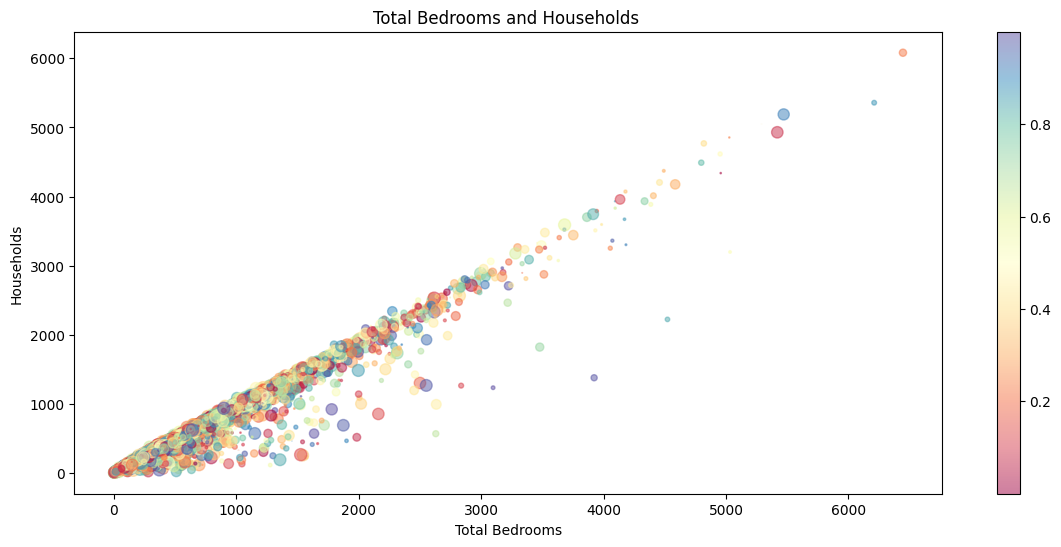

In [13]:
plt.figure(figsize=(14, 6))

plt.rcParams['axes.grid'] = False 

plt.title('Total Bedrooms and Households ')

colors = np.random.rand(df["total_bedrooms"].size)
area = np.pi * (5 * np.random.rand(df["total_bedrooms"].size))**2 

plt.xlabel('Total Bedrooms')
plt.ylabel('Households')

plt.scatter(df["total_bedrooms"], df["households"], s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

In [14]:
df["total_bedrooms"]/df["households"]

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Length: 20640, dtype: float64

**Analyzing categorical values

We have ocean proximity column which has categorical value in our dataset. 

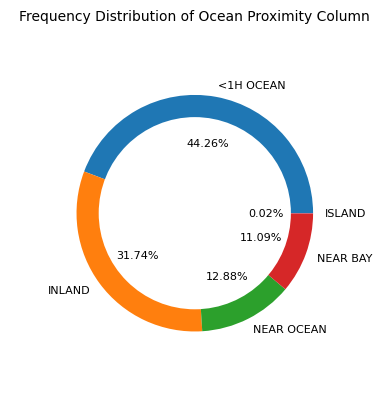

In [15]:
distance_count = df["ocean_proximity"].value_counts()
distance_index = distance_count.index

plt.pie(distance_count, labels=distance_index, autopct="%.2f%%",pctdistance=0.6,textprops={'fontsize': 8}, radius = 0.8)
plt.title("Frequency Distribution of Ocean Proximity Column", fontsize = 10)

centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [16]:
print(df["ocean_proximity"].value_counts().rename_axis('indexes').reset_index(name='counts'))

      indexes  counts
0   <1H OCEAN    9136
1      INLAND    6551
2  NEAR OCEAN    2658
3    NEAR BAY    2290
4      ISLAND       5


**Handling categorical values

We will create a numeric dictionary for replace the categorical values

In [17]:
categorical_value_map = {"ocean_proximity": {
                              "<1H OCEAN": 2, 
                              "INLAND": 1, 
                              "NEAR OCEAN": 4, 
                              "NEAR BAY": 3,
                              "ISLAND": 5
                            }
                        }

df_replace = df.copy()
df_replace.replace(categorical_value_map, inplace=True)
df_replace.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


**Detect and Handling  Outliers

We can detect outliers with using Z-score. Steps for calculating outliers with using z-score;

   1. Calculate the Z-score using the formula (x-mean)/std.
   2. Define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold        as outliers.


In [18]:
outliers = []
def get_outliers_zscore(data):
    #outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > thres:
            outliers.append(i)
    return outliers

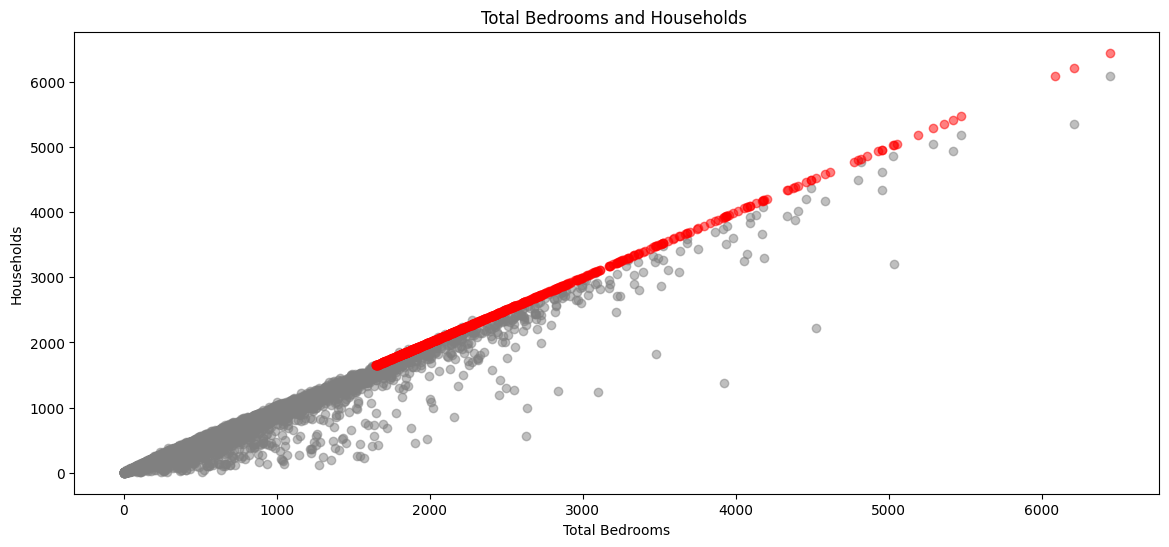

In [19]:
plt.figure(figsize=(14, 6))
plt.title('Total Bedrooms and Households ')

area = np.pi * (5 * np.random.rand(df["total_bedrooms"].size))**2 

plt.xlabel('Total Bedrooms')
plt.ylabel('Households')

plt.scatter(df["total_bedrooms"], df["households"], c="grey", alpha=0.5)

outlier_datapoints_total_bedrooms = get_outliers_zscore(df_replace["total_bedrooms"])
outlier_datapoints_households = get_outliers_zscore(df_replace["households"])

plt.scatter(outlier_datapoints_total_bedrooms, outlier_datapoints_households,c="red", alpha=0.5)

plt.show()

In [28]:
# len - 1 without in categorical values.

outlier_data = []
n=len(df_replace.count()) - 1

for i in range(n):
    outlier_data.append(get_outliers_zscore(df_replace.iloc[:,i]))



In [29]:
def replace_outlier_values(data, sample_index):
    median = np.median(data)
    index = 0
    if len(outlier_data[sample_index]) == 0: # if sample has no outlier
        return
    for (i, v) in data.iteritems():
        if outlier_data[sample_index][index] == v: # if sample has outlier than assign the outlier to median value
            data[i] = median
            if index < len(outlier_data[sample_index]) - 1:
                index +=1

In [ ]:
df_outliers = df_replace.copy()
for i in range(len(outlier_data)):
    replace_outlier_values(df_outliers.iloc[:,i], i)

If the mean of the dataset is affected by outliers,we can understand this calculate the average of the columns with and without outliers.

In [31]:
df_average = pd.DataFrame(df_replace.mean() , columns=['Mean with outliers'])
df_average['Mean without outliers'] = df_outliers.mean()

df_average

,Mean with outliers,Mean without outliers
longitude,-119.569704,-119.569704
latitude,35.631861,35.631861
housing_median_age,28.639486,28.639486
total_rooms,2635.763081,2635.713905
total_bedrooms,537.723915,499.744358
population,1425.476744,1425.274079
households,499.539680,499.539680
median_income,3.870671,3.870671
median_house_value,206855.816909,206855.816909
ocean_proximity,2.051841,2.051841


Generally median of the dataset is not affected outliers. To guarantee, we can calculate median of the columns with and without outliers.

In [32]:
df_mean = pd.DataFrame(df_replace.median() , columns=['Median with outliers'])
df_mean['Median without outliers'] = df_outliers.median()

df_mean

,Median with outliers,Median without outliers
longitude,-118.4900,-118.4900
latitude,34.2600,34.2600
housing_median_age,29.0000,29.0000
total_rooms,2127.0000,2127.0000
total_bedrooms,435.0000,435.0000
population,1166.0000,1166.0000
households,409.0000,409.0000
median_income,3.5348,3.5348
median_house_value,179700.0000,179700.0000
ocean_proximity,2.0000,2.0000


**Selecting Model

We will use a Regression for estimate house prices in California. We will use sci-kit Random Forest Reggression model in this project. I  must divide dataset into train, validation and test.

The road is the model;

   1. Reorder "median_house_value" and "ocean_proximity" columns in the dataset.
   2. Split dataset as train, validation and test
   3. Scale the dataset (standardization is to bring down all the features to a common scale without distorting the differences in the range of the values)
   4. Train model
   5. Calculate train and test score of the model
   6. Fine tune hyperparameters for acquiring better accuracy

In [33]:
# Reorder "median_house_value" and "ocean_proximity" columns in the dataset.
cols = ['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms', 
        'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value' ]

dataset = df_outliers.copy()[cols]
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [58]:
# Dividing dataset into attributes and label sets
x = dataset.iloc[:, 0:9]
y = dataset.median_house_value

In [79]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

time_start = time.time()

def evaluate_models(X, y):
    # Split dataset as test and train
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    # Scale the dataset. Standardization is to bring down all the features to a common scale
    sc = StandardScaler()
    sc.fit(x_train)
    sc.fit(x_test)
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    
    # Train dataset separates the validation part (25%) from itself
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, shuffle = False)
    
    # Train, validation and test datasets info
    all = {"x train" : x_train,
       "x validation" : x_val,
       "x test" : x_test,
       "y train" : y_train,
       "y validation": y_val,
       "y test": y_test}

    for i in all:
        print(f"{i} row count: {len(all.get(i))}")
    print("**************************************")
    
    # Train and evaluate a random forest regressor
    rfr = RandomForestRegressor(n_estimators=100, max_features = 0.5, random_state=42)
    rfr.fit(x_train, y_train)
    y_pred = rfr.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    Training_score = rfr.score(x_train, y_train)
    Testing_score = rfr.score(x_test, y_test)
    Root_Mean_Squared_Error = rmse
    
    # Estimating running time of the model
    time_end = time.time() 
    print(f'Run time : {time_end - time_start}')
    
    # Print
    print('Training score: ' , Training_score)
    print('Testing score:  ', Testing_score)
    print('Root Mean Squared Error:', rmse)

In [80]:
evaluate_models(x, y)

x train row count: 12384
x validation row count: 4128
x test row count: 4128
y train row count: 12384
y validation row count: 4128
y test row count: 4128
**************************************
Run time : 6.601199388504028
Training score:  0.9743847226632736
Testing score:   0.8141161738169611
Root Mean Squared Error: 49378.34674941262
